In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

In [2]:
test_dataset = Dataset("./test.nc", "w", format="NETCDF4")

In [3]:
#dimensions
test_dataset.createDimension("level", None)
test_dataset.createDimension("time", None)
test_dataset.createDimension("lat", 73)
test_dataset.createDimension("lon", 144)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144

In [4]:
#variables declaration
times = test_dataset.createVariable("time", 'd', ("time"))
lats = test_dataset.createVariable("lat", 'd', ('lat'))
lons = test_dataset.createVariable("lon", 'd', ('lon'))
levels = test_dataset.createVariable("level", 'd', ("level"))
temp = test_dataset.createVariable("temp", 'd', 
                ("time", "level", "lat", "lon"))

In [5]:
#variables atributes and global atributes
test_dataset.description = "example dataset"
lats.units = "degrees north"
lons.units = "degrees east"
levels.units = "hPa"
times.units = "hours after start"

In [6]:
#fill variables with data
lats = np.arange(-90.0, 91.0, 2.5)
lons = np.arange(-180.0, 180.0, 2.5)
temp[0:5, 0:10, :, :] = np.random.uniform(size=(5, 10,
                                         len(test_dataset.dimensions["lat"]),
                                         len(test_dataset.dimensions["lon"])))
levels = [1000.,850.,700.,500.,300.,250.,200.,150.,100.,50.]

In [7]:
test_dataset.close()
data = xr.open_dataset("./test.nc")

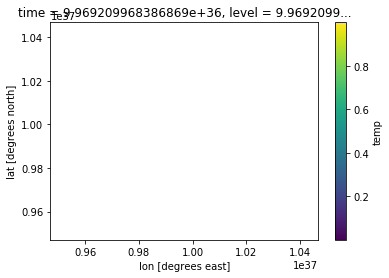

In [15]:
data["temp"][1][0].plot()